# Problem 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nych = np.genfromtxt("data/nyc_housing.txt",delimiter=None) # load the text file
Y = nych[:,-1] # target value (NYC borough) is the last column 
X = nych[:,0:-1] # features are the other columns

print("The number of features: ")
print(X.shape[1])
print("The number of data points: ")
print(X.shape[0])

The number of features: 
3
The number of data points: 
300


# Problem 1.2

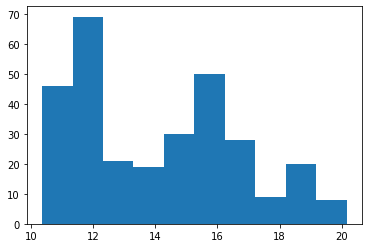

In [2]:
plt.hist(nych[:,0])
plt.show()

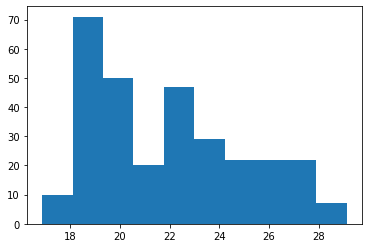

In [3]:
plt.hist(nych[:,1])
plt.show()

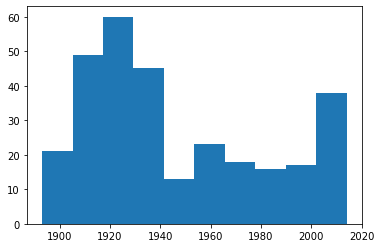

In [4]:
plt.hist(nych[:,2])
plt.show()

# Problem 1.3

In [5]:
np.mean(nych[:,0])

14.118392438424483

In [6]:
np.std(nych[:,0])

2.569090284260317

In [7]:
np.mean(nych[:,1])

21.907116176170856

In [8]:
np.std(nych[:,1])

2.9785784999947165

In [9]:
np.mean(nych[:,2])

1946.3533333333332

In [10]:
np.std(nych[:,2])

35.39889577687731

# Problem 1.4

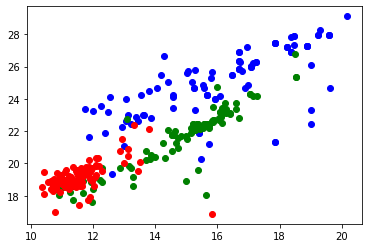

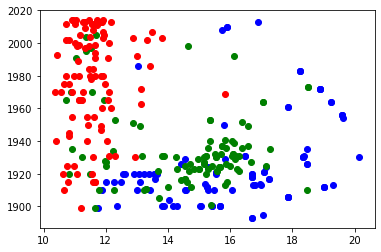

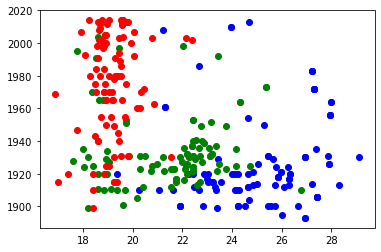

In [11]:
colours = ['b', 'g', 'r']

# Pair of features (1, 2)
for i in np.unique(Y):
    plt.plot(X[Y == i, 0], X[Y == i, 1], 'o', color = colours[int(i)])
plt.show()

# Pair of features (1, 3)
for i in np.unique(Y):
    plt.plot(X[Y == i, 0], X[Y == i, 2], 'o', color = colours[int(i)])
plt.show()

# Pair of features (2, 3)
for i in np.unique(Y):
    plt.plot(X[Y == i, 1], X[Y == i, 2], 'o', color = colours[int(i)])
plt.show()

# Problem 2.1

In [12]:
nych = np.genfromtxt("data/nyc_housing.txt",delimiter=None) # load the data 
Y = nych[:,-1]
X = nych[:,0:2]
# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns); 
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We'll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir # or add it to your path inside Python:
# import sys
# sys.path.append('/path/to/parent/dir/');

np.random.seed(0) # set the random number seed
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation

'''
knn = ml.knn.knnClassify() # create the object and train it
knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction
YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva

# Alternatively, the constructor provides a shortcut to "train":
knn = ml.knn.knnClassify( Xtr, Ytr, K );
YvaHat = predict( knn, Xva );

ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)
'''

'\nknn = ml.knn.knnClassify() # create the object and train it\nknn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction\nYvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva\n\n# Alternatively, the constructor provides a shortcut to "train":\nknn = ml.knn.knnClassify( Xtr, Ytr, K );\nYvaHat = predict( knn, Xva );\n\nml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)\n'

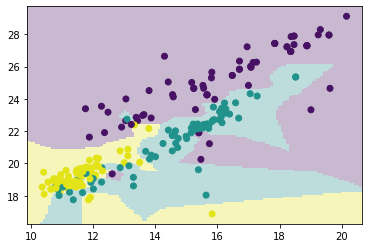

In [13]:
knn = ml.knn.knnClassify()
knn.train(Xtr[:, :2], Ytr, K=1)

ml.plotClassify2D(knn, Xtr[:, :2], Ytr)
plt.show()

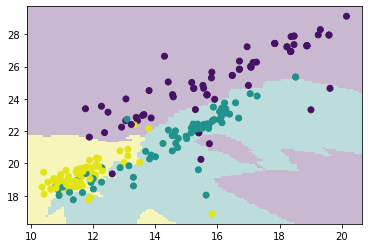

In [14]:
knn = ml.knn.knnClassify()
knn.train(Xtr[:, :2], Ytr, K=5)

ml.plotClassify2D(knn, Xtr[:, :2], Ytr)
plt.show()

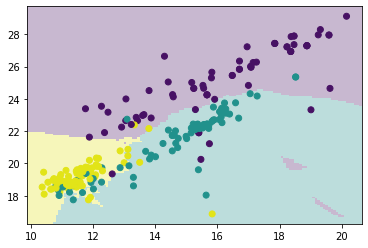

In [15]:
knn = ml.knn.knnClassify()
knn.train(Xtr[:, :2], Ytr, K=10)

ml.plotClassify2D(knn, Xtr[:, :2], Ytr)
plt.show()

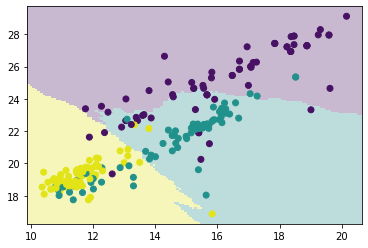

In [16]:
knn = ml.knn.knnClassify()
knn.train(Xtr[:, :2], Ytr, K=50)

ml.plotClassify2D(knn, Xtr[:, :2], Ytr)
plt.show()

# Problem 2.2

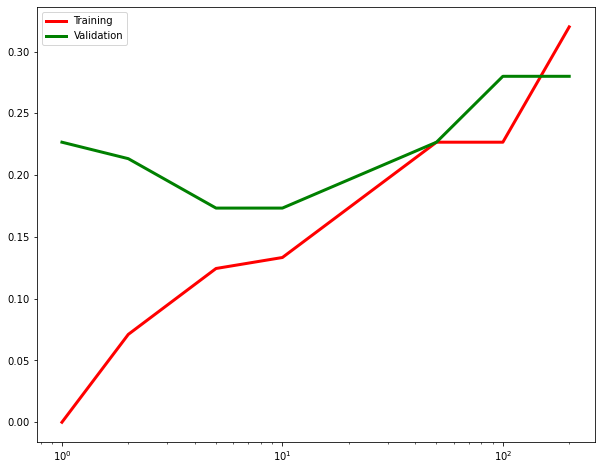

In [17]:
Y = nych[:,-1]
X = nych[:,0:2]

np.random.seed(0)
X,Y = ml.shuffleData(X,Y);

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

K = [1,2,5,10,50,100,200];

errTrain = [None]*len(K) # (preallocate storage for training error) 
errValid = [None]*len(K)

for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr[:, :2], Ytr, K = k); # TODO: complete code to train model
    # Yhat = learner.predict(Xva) # TODO: predict results on training data
    errTrain[i] = learner.err(Xtr, Ytr) # TODO: count what fraction of predictions are wrong 
    errValid[i] = learner.err(Xva, Yva)
                           
#plt.semilogx(K, errTrain, 'r', K, errValid, 'g') #TODO: average and plot results on semi-log scale

# Creating subplots with just one subplot so basically a single figure.
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# I added lw (line width) and the label. 
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValid, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# And still doing this to clean the canvas.
plt.show()

# Problem 2.3

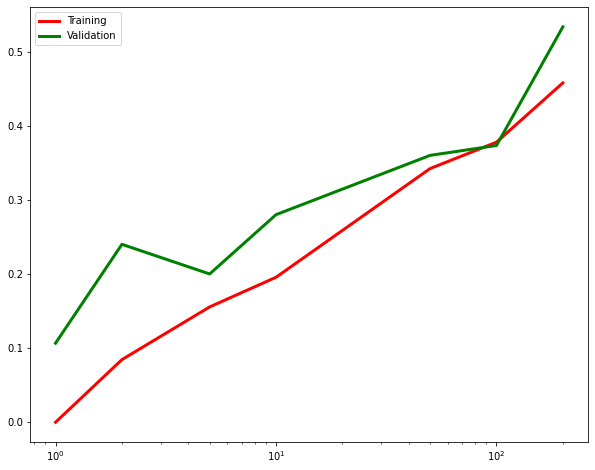

In [18]:
Y = nych[:,-1]
X = nych[:,0:-1]

np.random.seed(0)
X,Y = ml.shuffleData(X,Y);

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

K = [1,2,5,10,50,100,200];

errTrain = [None]*len(K) # (preallocate storage for training error) 
errValid = [None]*len(K)

for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr, Ytr, K = k); # TODO: complete code to train model
    # Yhat = learner.predict(Xva) # TODO: predict results on training data
    errTrain[i] = learner.err(Xtr, Ytr) # TODO: count what fraction of predictions are wrong 
    errValid[i] = learner.err(Xva, Yva)
                           
#plt.semilogx(K, errTrain, 'r', K, errValid, 'g') #TODO: average and plot results on semi-log scale

# Creating subplots with just one subplot so basically a single figure.
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# I added lw (line width) and the label. 
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValid, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# And still doing this to clean the canvas.
plt.show()

# Problem 3.1

$$P(Y=1) = 4/10$$

$$P(X1=1|Y=1) = 3/4$$
$$P(X2=1|Y=1) = 0/4$$
$$P(X3=1|Y=1) = 3/4$$
$$P(X4=1|Y=1) = 2/4$$
$$P(X5=1|Y=1) = 1/4$$

$$P(X1=0|Y=1) = 1/4$$
$$P(X2=0|Y=1) = 4/4$$
$$P(X3=0|Y=1) = 1/4$$
$$P(X4=0|Y=1) = 2/4$$
$$P(X5=0|Y=1) = 3/4$$

$$P(Y=-1) = 6/10$$

$$P(X1=1|Y=-1) = 3/6$$
$$P(X2=1|Y=-1) = 5/6$$
$$P(X3=1|Y=-1) = 4/6$$
$$P(X4=1|Y=-1) = 5/6$$
$$P(X5=1|Y=-1) = 2/6$$

$$P(X1=0|Y=-1) = 3/6$$
$$P(X2=0|Y=-1) = 1/6$$
$$P(X3=0|Y=-1) = 2/6$$
$$P(X4=0|Y=-1) = 1/6$$
$$P(X5=0|Y=-1) = 4/6$$

# Problem 3.2

x = (0 0 0 0 0):

$$P(Y=1)P(X1=0|Y=1)P(X2=0|Y=1)P(X3=0|Y=1)P(X4=0|Y=1)P(X5=0|Y=1)$$
$$=4/10*1/4*1*1/4*2/4*3/4$$
$$=0.009375$$
$$P(Y=-1)P(X1=0|Y=-1)P(X2=0|Y=-1)P(X3=0|Y=-1)P(X4=0|Y=-1)P(X5=0|Y=-1)$$
$$=6/10*3/6*1/6*2/6*1/6*4/6$$
$$=0.001851$$

Since 0.009375 > 0.001851, x = (0 0 0 0 0) will predict class y = 1.

x = (1 1 0 1 0):

$$P(Y=1)P(X1=1|Y=1)P(X2=1|Y=1)P(X3=0|Y=1)P(X4=1|Y=1)P(X5=0|Y=1)$$
$$=4/10*3/4*0*1/4*2/4*3/4$$
$$=0$$
$$P(Y=-1)P(X1=1|Y=-1)P(X2=1|Y=-1)P(X3=0|Y=-1)P(X4=1|Y=-1)P(X5=0|Y=-1)$$
$$=6/10*3/6*5/6*2/6*5/6*4/6$$
$$=0.046296$$

Since 0.046296 > 0, x = (1 1 0 1 0) will predict class y = -1.

# Problem 3.3

$$P(Y = 1 | X = (0 0 0 0 0) = \frac { P(Y = 1) P(X = (0 0 0 0 0) | Y = 1) } { P(Y = 1) P(X = (0 0 0 0 0) | Y = 1) + P(Y = -1) P(X = (0 0 0 0 0) | Y = -1) } = \frac {0.009375}{0.009375 + 0.001851} = 0.835115$$

$$P(Y = 1 | X = (1 1 0 1 0) = \frac {P(Y = 1) P(X = (1 1 0 1 0) | Y = 1) } { P(Y = 1) P(X = (1 1 0 1 0) | Y = 1) + P(Y = -1) P(X = (1 1 0 1 0) | Y = -1) } = \frac {0} {0 + 0.046296} = 0$$

# Problem 3.4

We should probably not use a “joint” Bayes classifier for these data becasue our sample size is too small for the “joint” Bayes classifier. 

# Problem 3.5

We have no need to re-train the model because the probability for features are independent to each other. 
We will not use x1 but only x2 + x3 + x4 + x5.

$$P(Y = 1 | X = (X2, X3, X4, X5) = \frac { P(Y = 1) P(X = (X2, X3, X4, X5) | Y = 1) } { P(Y = 1) P(X = (X2, X3, X4, X5) | Y = 1) + P(Y = -1) P(X = (X2, X3, X4, X5) | Y = -1) }$$

# Problem 4.1

In [19]:
nych = np.genfromtxt("data/nyc_housing.txt",delimiter=None) # load the data 
Y = nych[:,-1]
X = nych[:,0:2]
# Note: indexing with ":" indicates all values (in this case, all rows);
# indexing with a value ("0", "1", "-1", etc.) extracts only that value (here, columns); 
# indexing rows/columns with a range ("1:-1") extracts any row/column in that range.

import mltools as ml
# We'll use some data manipulation routines in the provided class code
# Make sure the "mltools" directory is in a directory on your Python path, e.g.,
# export PYTHONPATH=$\$${PYTHONPATH}:/path/to/parent/dir # or add it to your path inside Python:
# import sys
# sys.path.append('/path/to/parent/dir/');

np.random.seed(0) # set the random number seed
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)

Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation

np.shape(Xtr)

(225, 2)

In [20]:
Xtr0 = []
Xtr1 = []
Xtr2 = []

for i in range(225):
    if Ytr[i] == 0:
        Xtr0.append(Xtr[i])
    elif Ytr[i] == 1:
        Xtr1.append(Xtr[i])
    elif Ytr[i] == 2:
        Xtr2.append(Xtr[i])

Xtr0 = np.array(Xtr0)
Xtr1 = np.array(Xtr1)
Xtr2 = np.array(Xtr2)
        
Xtr0Mean = np.mean(Xtr0, axis = 0)
Xtr0Cov = np.cov(Xtr0.T)

print("For Y = 0, the empirical mean vector is:", Xtr0Mean)
print("The covariance matrix is:")
print(Xtr0Cov)


Xtr1Mean = np.mean(Xtr1, axis = 0)
Xtr1Cov = np.cov(Xtr1.T)

print("For Y = 1, the empirical mean vector is:", Xtr1Mean)
print("The covariance matrix is:")
print(Xtr1Cov)

Xtr2Mean = np.mean(Xtr2, axis = 0)
Xtr2Cov = np.cov(Xtr2.T)

print("For Y = 2, the empirical mean vector is:", Xtr2Mean)
print("The covariance matrix is:")
print(Xtr2Cov)

For Y = 0, the empirical mean vector is: [16.16072703 25.09873529]
The covariance matrix is:
[[5.10048908 3.95895935]
 [3.95895935 4.75599524]]
For Y = 1, the empirical mean vector is: [14.49622311 21.33757479]
The covariance matrix is:
[[3.66364855 3.36178359]
 [3.36178359 3.71261651]]
For Y = 2, the empirical mean vector is: [11.62077481 19.23708995]
The covariance matrix is:
[[0.73901117 0.3035573 ]
 [0.3035573  0.70945946]]


# Problem 4.2

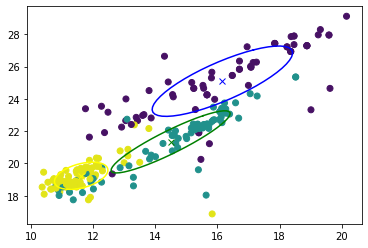

In [21]:
p0 = ml.plotGauss2D(Xtr0Mean, Xtr0Cov, color = "Blue")
p1 = ml.plotGauss2D(Xtr1Mean, Xtr1Cov, color = "Green")
p2 = ml.plotGauss2D(Xtr2Mean, Xtr2Cov, color = "Yellow")
ml.plotClassify2D(None, Xtr[:, 0:2], Ytr);

# Problem 4.3

The empirical error rate on Trainning data is:  0.15555555555555556
The empirical error rate on Validation data is:  0.13333333333333333


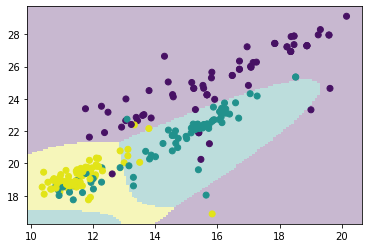

In [22]:
bc = ml.bayes.gaussClassify(Xtr, Ytr);
ml.plotClassify2D(bc, Xtr, Ytr);

print("The empirical error rate on Trainning data is: ", bc.err(Xtr, Ytr))
print("The empirical error rate on Validation data is: ", bc.err(Xva, Yva))

# Problem 5

When I started this assignment, I had a problem on loading data sets and the editor popped out an error message that claimed access not permitted. Me and Jiefu Ling discussed on how to load the data set and problems about environment set up such as how to set up Anaconda to launch Jupyter Notebook. For the rest problems, I copied some codes from Discussion files: "01a_loading_data_and_plotting" and "01b_using_mltools_package".